# Training the data:
A training model is a dataset that is used to train an ML algorithm. It consists of the sample output data and the corresponding sets of input data that have an influence on the output. The training model is used to run the input data through the algorithm to correlate the processed output against the sample output. The result from this correlation is used to modify the model.

In [1]:
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')

#  Importing  RAW Data

In [2]:
data=pd.read_excel(r"C:\Users\user\Downloads\DataMites\Certificates and projects by Datamites\IABAC CERTIFICATE PROJECT\IABAC PROJECT. (1)\IABAC\data\raw\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
# To see all the data
data

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [4]:
# To see the first five data
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
# To see the last five data
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,...,1,4,3,3,2,2,2,0,Yes,2


## Heatmap

In [6]:
corr_matrix=data.corr()

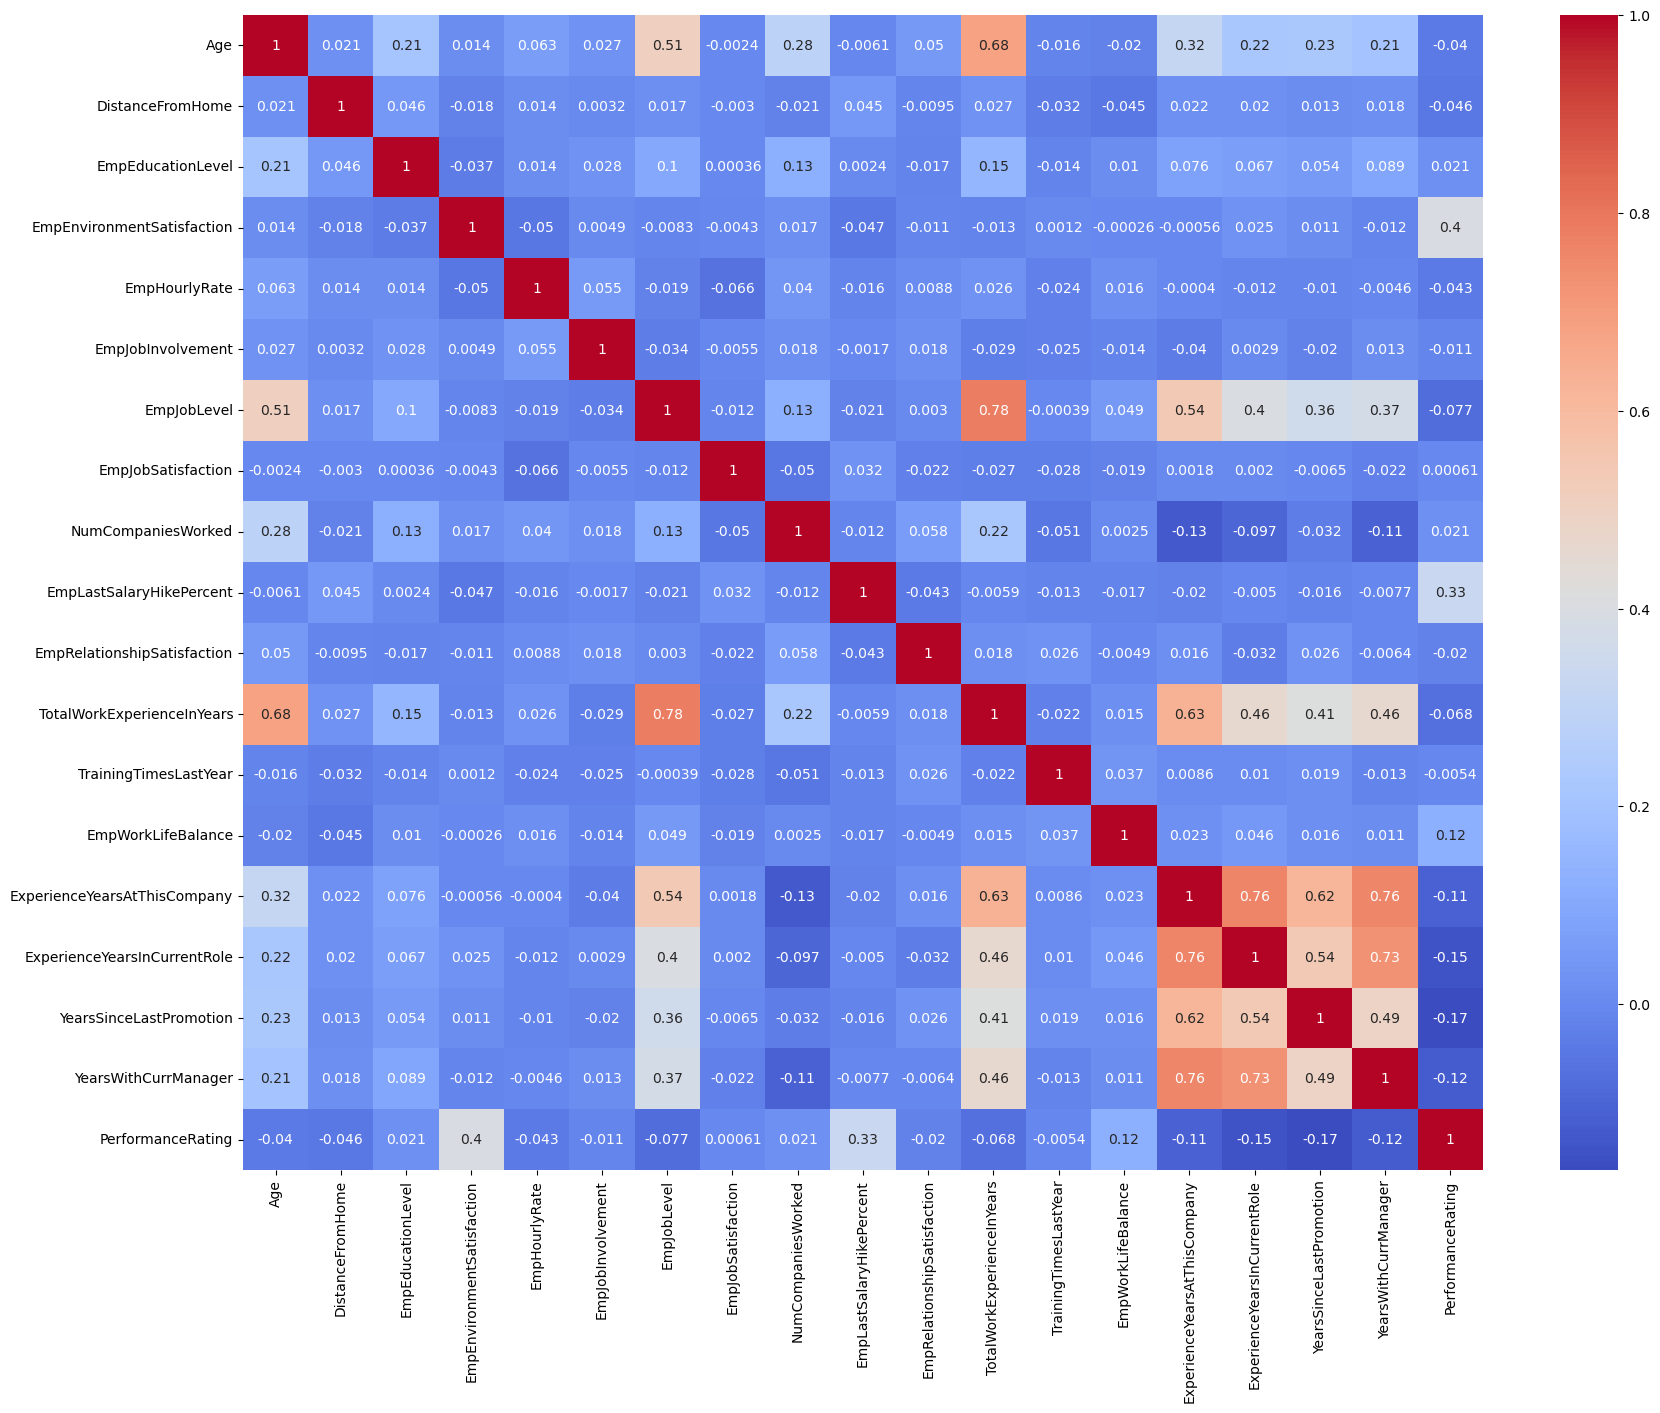

In [7]:
# Increase the figure size
plt.figure(figsize=(20, 15))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Insights:
**Age and Total Work Experience in Years:**

A robust positive correlation (0.68) between age and total work experience indicates that as employees age, they tend to accumulate more work experience.

**EmpJobLevel and TotalWorkExperienceInYears:**

A substantial positive correlation (0.78) between job level and total work experience highlights that employees with extensive work experience often attain higher job levels.

**EmpLastSalaryHikePercent and PerformanceRating:**

A moderate positive correlation (0.33) between the percentage of the last salary hike and performance rating suggests that employees receiving a higher salary increase tend to achieve higher performance ratings.

**EmpDepartment and EmpJobRole:**

A relatively strong positive correlation (0.57) between department and job role reveals that specific job roles are associated with particular departments.

**EmpEnvironmentSatisfaction and EmpJobSatisfaction:**

A positive correlation (0.39) between environmental satisfaction and job satisfaction indicates that employees content with their work environment are likely to be satisfied with their job.

**YearsWithCurrManager and ExperienceYearsInCurrentRole:**

A robust positive correlation (0.73) between the years with the current manager and years in the current role suggests that employees tend to have the same manager for an extended period in roles they've held for a longer time.

**Attrition and Age:**

A negative correlation (-0.19) between attrition and age implies that younger employees may be more inclined to leave the company.

**PerformanceRating and EmpEnvironmentSatisfaction:**

A relatively strong positive correlation (0.40) between performance rating and environmental satisfaction suggests that employees satisfied with their work environment may receive higher performance ratings.
These data-driven insights provide a comprehensive understanding of the relationships and trends within the employee dataset, offering valuable information for strategic decision-making.


In [8]:
## 3 top factors that affecting the performance of employees

In [9]:
# Find the correlations of PerformanceRating column
performance_correlations=corr_matrix['PerformanceRating'].sort_values(ascending=False)

In [10]:
# top 3 factors affecting employee performance
top_3_factors=performance_correlations[1:4] 
print("Top 3 Factors affecting employee performance:")
print(top_3_factors)

Top 3 Factors affecting employee performance:
EmpEnvironmentSatisfaction    0.395561
EmpLastSalaryHikePercent      0.333722
EmpWorkLifeBalance            0.124429
Name: PerformanceRating, dtype: float64


## Label Encoding
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project

In [11]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


In [12]:
# Drop a column (e.g., column 'B')
data.drop('EmpNumber', axis=1, inplace=True)

# Display the modified DataFrame
print(data)

      Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    2              2              5   
1      47       1                    2              2              5   
2      40       1                    1              1              5   
3      41       1                    0              0              3   
4      60       1                    2              2              5   
...   ...     ...                  ...            ...            ...   
1195   27       0                    3              0              5   
1196   37       1                    1              2              1   
1197   50       1                    3              1              1   
1198   34       0                    3              2              0   
1199   24       0                    1              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             13                        2                10   
1        

## Checking Feature Importance

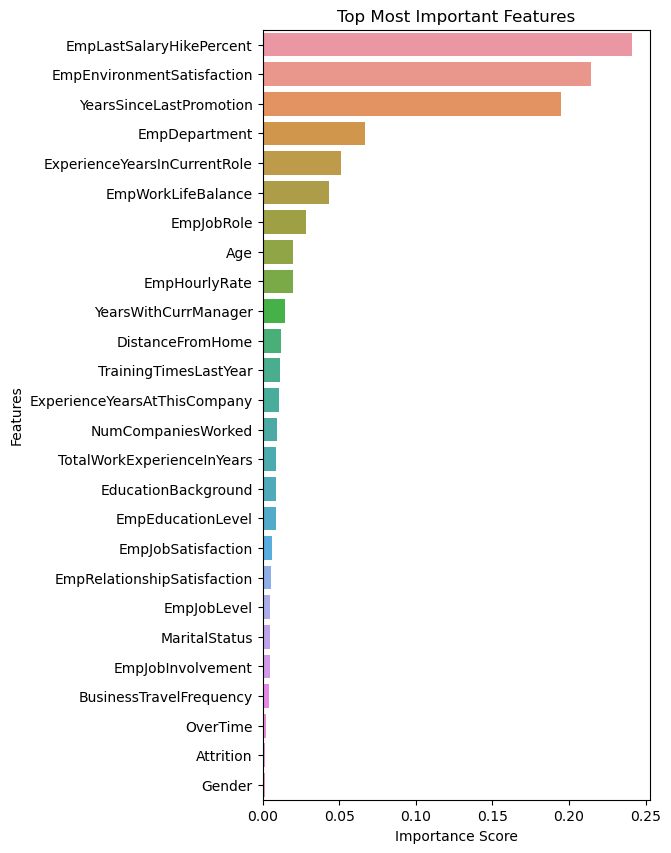

In [13]:
from sklearn.ensemble import RandomForestRegressor
x=data.drop('PerformanceRating',axis=1)
y=data['PerformanceRating']
# Train your Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x, y)

importances = rf_model.feature_importances_

# Create a dataframe of feature importances
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': importances})

# Sort the dataframe by feature importance score
feat_imp = feat_imp.sort_values('importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(5,10))
sns.barplot(x='importance', y='feature', data=feat_imp)
plt.title('Top Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [14]:
data.to_excel('preprocessed_data.xlsx', index=False)  # This will save the DataFrame as an Excel file with the name 'preprocessed_data.xlsx' and without an index column.

In [15]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


In [16]:
#  creation of independent variable and dependent variable
x=data.drop('PerformanceRating',axis=1)
y=data['PerformanceRating']

## splitting

In [17]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 26)
(240, 26)
(960,)
(240,)


### Standard scaling
Standard scaling, also known as z-score scaling, is a technique used to scale your data so that it has a mean of 0 and a standard deviation of 1

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# The result will be a NumPy array with scaled values
print(scaled_data)

[[-0.54145787  0.80942721 -0.17945861 ...  1.10025139 -0.41733475
   0.09961771]
 [ 1.10988772  0.80942721 -0.17945861 ...  0.8177735  -0.41733475
   0.09961771]
 [ 0.33925978  0.80942721 -0.94311225 ...  2.23016296 -0.41733475
   2.02770238]
 ...
 [ 1.44015684  0.80942721  0.58419504 ...  1.10025139 -0.41733475
   0.09961771]
 [-0.32127846 -1.23544154  0.58419504 ...  0.8177735  -0.41733475
   0.09961771]
 [-1.42217552 -1.23544154 -0.94311225 ... -1.15957175  2.39615797
  -1.82846697]]


In [20]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### SMOTE
to oversample due to the skewness in target
Given the evident imbalance in the values within the target variable, we will proceed to address this skewed distribution by applying the SMOTE method using the imbalanced-learn (imblearn) Python package.

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [22]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [23]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({3: 705, 2: 154, 4: 101})
SMOTE Classes Counter({3: 705, 2: 705, 4: 705})


In [24]:
data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [25]:
y_smote.value_counts()

3    705
2    705
4    705
Name: PerformanceRating, dtype: int64

# Conclusion
In the realm of machine learning, the division of data into two sets, denoted as "X" and "y," is a fundamental practice in the context of supervised learning. This segregation serves a crucial role in the training and evaluation of machine learning models. Here's a breakdown of why data is bifurcated into X and y:

**Feature Variables (X):**

"X" represents the feature variables, encompassing the attributes or input variables that the model utilizes to formulate predictions. These features embody the characteristics or attributes of the data essential for the model to discern patterns and relationships. Features can manifest as numeric values, categorical variables, or a combination of both.

**Target Variable (y):**

"y" represents the target variable, signifying the output variable the model endeavors to predict. This variable holds the labels or values that the model strives to learn and predict. In classification scenarios, "y" typically denotes category or class labels, while in regression scenarios, it signifies numeric values.

**Significance of the Split:**

* Training the Model: The feature variables (X) serve as the foundation for training the machine learning model. The model extracts insights from the patterns and relationships within the feature variables to enhance its predictive capabilities.

* Supervised Learning: In supervised learning, the model derives knowledge from labeled data where the target variable (y) furnishes the ground truth. The model leverages X to comprehend the intricate relationship between the features and the target variable.

* Testing and Evaluation: Post-training, the model undergoes assessment using a distinct dataset. The model's predictions (based on X) are juxtaposed against the actual target values (y) within the testing or validation dataset. This evaluation is instrumental in gauging the model's accuracy and its ability to generalize to new, unseen data.

* Prediction: Once trained and evaluated, the model stands ready to make predictions on new, unseen data. This involves inputting feature values (X) into the model, which then generates predictions or estimates for the target variable (y).

This systematic division into X and y sets the stage for effective machine learning model development, evaluation, and deployment.






